## Lab 2: Regression (100 points total)
For this assignment use the Diabetes dataset from SciKit-Learn (imported below) to fit (1) a linear regression model using a single feature and (2) a linear regression model using multiple features. For each model report mean-squared error, r-squared, and the coefficients. Additionally provide a desciptive plot for each model.

##### Points breakdown
- Create Train/Test Set: 10 points
- Fit Model Using Single Feature: 15 points
- Fit Model Using Multiple Features: 15 points
- Report MSE, R-squared, and Coefficeints for EACH MODEL: 30 points (5 per metric)
- Create a Visualization for EACH MODEL: 30 points (15 points each)

In [1]:
from sklearn import datasets
from sklearn import *
import pandas as pd
diabetes_data = datasets.load_diabetes()

print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
diabetes_data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
diabetes_data.data.shape

(442, 10)

In [5]:
diabetes_data.target.shape

(442,)

In [6]:
db_df = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)

In [7]:
db_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [8]:
#adding target to features in dataset
db_df['target_f'] = diabetes_data.target #new column name 'target_f'

In [9]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target_f
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [10]:
#checking for missing values
db_df.isnull().sum()
db_df.isna().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
target_f    0
dtype: int64

there are no missing data in dataset

In [11]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  target_f  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
#independent variables
X = db_df.drop(labels='target_f', axis=1)  #axis=1 means we drop data by column.
#dependent variable
y = db_df['target_f']

In [13]:
#splitting the dataset into 75%-25% train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train['bmi'].values.reshape(-1,1), y_train)

LinearRegression()

In [15]:
predicted_y = lm.predict(X_test['bmi'].values.reshape(-1,1))

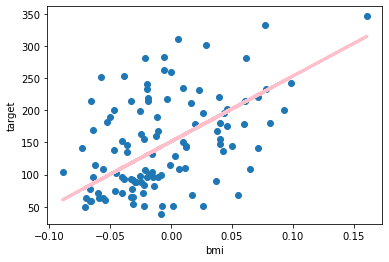

In [16]:
import matplotlib.pyplot as plt
plt.xlabel("bmi")
plt.ylabel("target")
plt.scatter(X_test['bmi'].values.reshape(-1,1),y_test)
plt.plot(X_test['bmi'].values.reshape(-1,1),predicted_y, color="pink",linewidth=3)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import numpy as np
print("coefficients : {}\n".format(lm.coef_))
print("Mean Squared error : {}\n".format(mean_squared_error(y_test,predicted_y)))
print("r-squared : {}\n".format(r2_score(y_test,predicted_y)))


coefficients : [1015.81069855]

Mean Squared error : 4309.221212879797

r-squared : 0.17466209865339177



# model fitting with multiple features

In [18]:
from sklearn.linear_model import LinearRegression
lm_multiple = LinearRegression()
lm_multiple.fit(X_train, y_train)

LinearRegression()

In [19]:
predicted_y_multiple = lm_multiple.predict(X_test)

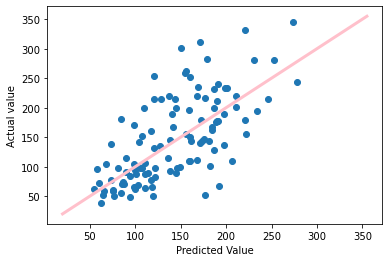

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("Predicted Value")
plt.ylabel("Actual value")
plt.plot([20,355],[20,355],color="pink",linewidth=3)
plt.scatter(predicted_y_multiple,y_test)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
print("coefficients : {}\n".format(lm_multiple.coef_))
print("Mean Squared error : {}\n".format(mean_squared_error(y_test,predicted_y_multiple)))
print("r-squared : {}\n".format(r2_score(y_test,predicted_y_multiple)))

coefficients : [  -7.85951708 -245.05253542  575.11667591  323.85372717 -519.77447335
  250.61132753    0.96367294  180.50891964  614.75959394   52.10619986]

Mean Squared error : 2903.1000013227986

r-squared : 0.4439741326507922

